In [1]:
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [2]:
X.shape
h = X.shape[1]
w = X.shape[2]

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
vol = X.shape[1:]
prod = np.prod(vol)
x = X.reshape(X.shape[0],prod)

In [6]:
x.shape

(603, 22500)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# Compute a PCA 

pca = PCA(n_components=100, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
pca.explained_variance_

array([21115796.72061706, 11993694.236196  ,  5497268.46752075,
        4437109.43179289,  3657031.86931127,  3295275.27542314,
        3132048.86343408,  2509922.5808511 ,  2361286.94197625,
        1669403.17411315,  1519232.01899146,  1194189.3451154 ,
        1152112.74535659,  1074848.9411681 ,  1013244.25616503,
         964151.00563903,   886051.33661361,   834494.5729637 ,
         797185.56054314,   725813.38292926,   717380.04709907,
         677970.95095156,   659063.34940716,   594235.22556879,
         583757.56593193,   569619.31147429,   524869.15357821,
         499623.60023021,   473790.87378281,   461081.1044956 ,
         445406.23702608,   427575.53962792,   423711.03472084,
         420816.75819762,   408473.28800315,   393530.52662664,
         376753.55611997,   372403.07993525,   359022.31128593,
         352438.29716688,   337862.90648775,   329608.10073317,
         322856.01672146,   316469.9926271 ,   309697.87725081,
         297314.37973795,   291710.50475

In [9]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.16036464
Validation score: 0.326087
Iteration 2, loss = 0.96716292
Validation score: 0.391304
Iteration 3, loss = 0.83348181
Validation score: 0.413043
Iteration 4, loss = 0.73238348
Validation score: 0.478261
Iteration 5, loss = 0.64741319
Validation score: 0.500000
Iteration 6, loss = 0.57648683
Validation score: 0.456522
Iteration 7, loss = 0.51670392
Validation score: 0.456522
Iteration 8, loss = 0.46459259
Validation score: 0.456522
Iteration 9, loss = 0.41867068
Validation score: 0.456522
Iteration 10, loss = 0.37637507
Validation score: 0.478261
Iteration 11, loss = 0.33821617
Validation score: 0.434783
Iteration 12, loss = 0.30345204
Validation score: 0.434783
Iteration 13, loss = 0.27161084
Validation score: 0.434783
Iteration 14, loss = 0.24333860
Validation score: 0.434783
Iteration 15, loss = 0.21698483
Validation score: 0.434783
Iteration 16, loss = 0.19395871
Validation score: 0.434783
Validation score did n

In [10]:
target_names = ['Anam','Angad','achintya']
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Anam       0.33      0.40      0.36        45
       Angad       0.48      0.40      0.44        52
    achintya       0.45      0.44      0.45        54

    accuracy                           0.42       151
   macro avg       0.42      0.42      0.42       151
weighted avg       0.43      0.42      0.42       151



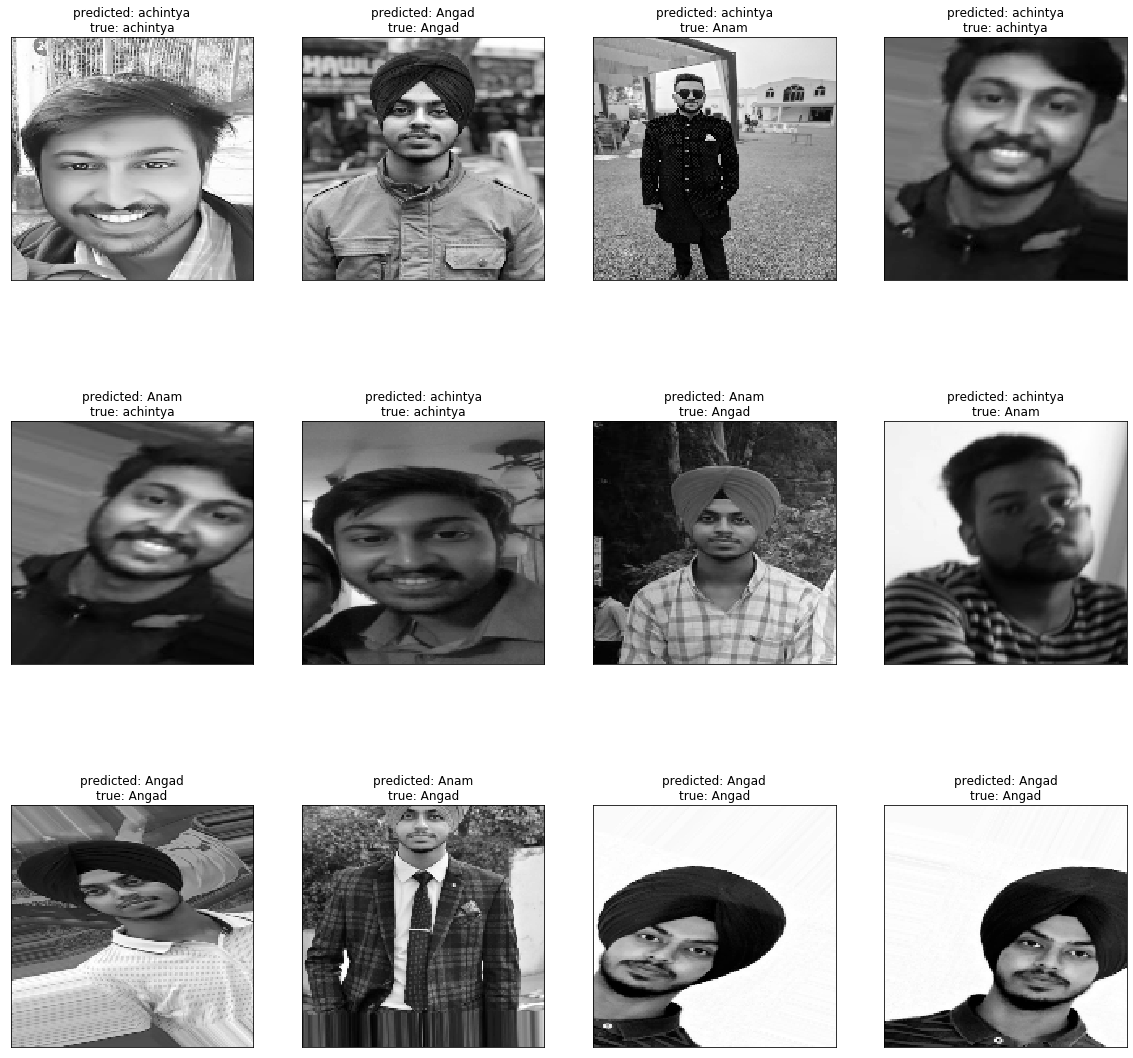

In [12]:
# Visualization
import matplotlib.pyplot as plt


def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(20,20))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = y_pred[i]
        true_name = y_test[i]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

In [1]:
!jt -r

Reset css and font defaults in:
C:\Users\FLASH\.jupyter\custom &
C:\Users\FLASH\AppData\Roaming\jupyter\nbextensions
